## ISLR - Chapter 4: Classification 
### Applied Exercises  
Creating classification models using logistic regression, linear discriminant analysis (LDA), QDA, and K-nearest neighbors

### Question 10: Weekly data 

In [1]:
library(ISLR)
Weekly[1:5, ]
attach(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


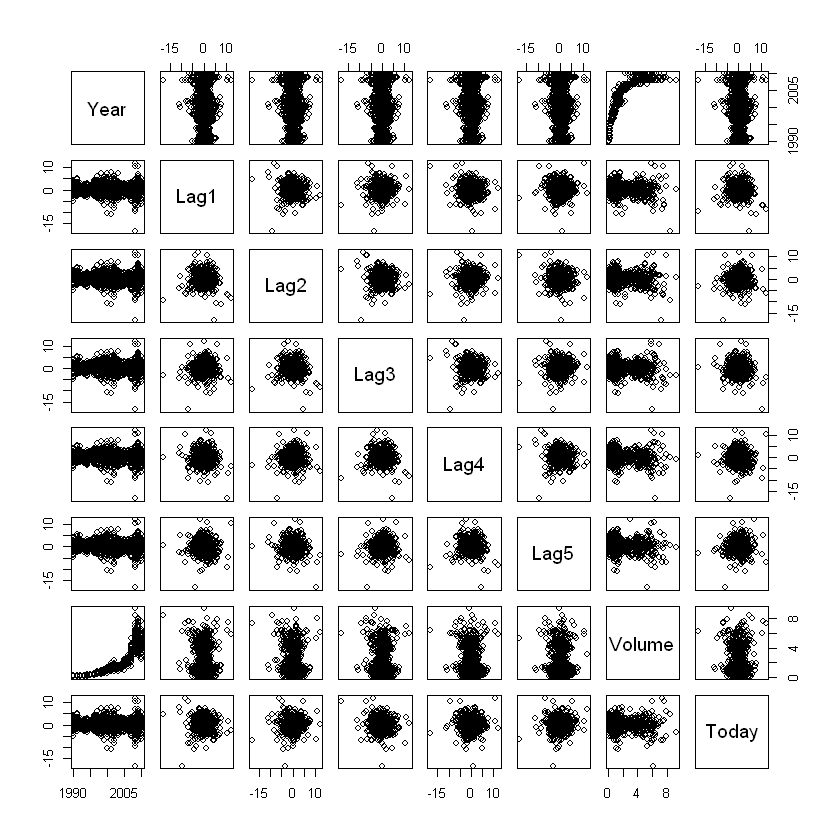

In [2]:
# Part A
cor(Weekly[,-9])
pairs(Weekly[, -9])
# There is a correlation between year and volume. All other variables don't have an obvious correlation


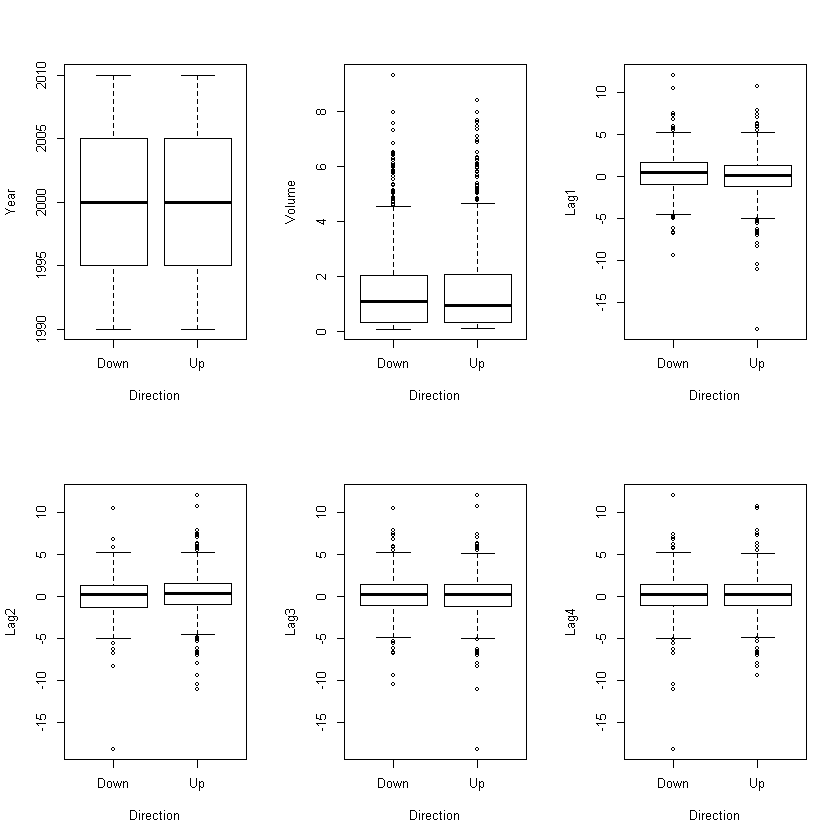

In [4]:
par(mfrow = c(2, 3))
plot(Year ~Direction)
plot(Volume ~Direction)
plot(Lag1 ~Direction)
plot(Lag2 ~Direction)
plot(Lag3 ~Direction)
plot(Lag4 ~Direction)

In [5]:
# Part B
glm.fit = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, family = "binomial" )
summary(glm.fit)
# There is some signifigance of Lag2, but all other predictors are not significant in this model


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [6]:
# Part C
contrasts(Direction)
Prediction = rep('Down', dim(Weekly)[1])
Prediction[glm.fit$fitted.values > 0.5] = 'Up'
confusion.matrix = table(Prediction, Direction)
print(confusion.matrix)
percent.correct = (sum(diag(confusion.matrix))/sum(confusion.matrix))
print(c("Correct Predictions:", percent.correct))


,Up
Down,0
Up,1


          Direction
Prediction Down  Up
      Down   54  48
      Up    430 557
[1] "Correct Predictions:" "0.561065197428834"   


According to the confusion matrix, the model is predicting far more "Up" values than "Down" values. While many of the actual Up values are correctly classified, many of the actual Down values are incorrectly classified as Up. 

In [7]:
# Part D - Logistic regression
train.weekly = Weekly[Year <= 2008,]
test.weekly = Weekly[Year > 2008,]

glm.fit2 = glm(Direction ~ Lag2, family='binomial', data=train.weekly)
summary(glm.fit2)

predictions.probs = predict(glm.fit2, newdata = test.weekly[,-9], type='response') 
y_hat = rep('Down', nrow(test.weekly))
y_hat[predictions.probs > 0.5] = 'Up'
y_actual = test.weekly$Direction


confusion.matrix = table(y_hat, y_actual)
print(confusion.matrix)
percent.correct = (sum(diag(confusion.matrix))/sum(confusion.matrix))
print(c("Correct Predictions:", percent.correct), quote=FALSE)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = train.weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


      y_actual
y_hat  Down Up
  Down    9  5
  Up     34 56
[1] Correct Predictions: 0.625               


In [11]:
# Part E - LDA
library(MASS )
lda.fit = lda(Direction~Lag2, data = train.weekly)
lda.predict = predict(lda.fit, newdata = test.weekly[-9])$class

confusion.matrix = table(lda.predict, y_actual)
print(confusion.matrix)
percent.correct = (sum(diag(confusion.matrix))/sum(confusion.matrix))
print(c("Correct Predictions:", percent.correct), quote = FALSE)

           y_actual
lda.predict Down Up
       Down    9  5
       Up     34 56
[1] Correct Predictions: 0.625               


In [12]:
# Part F - QDA
qda.fit = qda(Direction~Lag2, data = train.weekly)
qda.predict = predict(qda.fit, newdata = test.weekly[-9])$class

confusion.matrix = table(qda.predict, y_actual)
print(confusion.matrix)
percent.correct = (sum(diag(confusion.matrix))/sum(confusion.matrix))
print(c("Correct Predictions:", percent.correct), quote = FALSE)

           y_actual
qda.predict Down Up
       Down    0  0
       Up     43 61
[1] Correct Predictions: 0.586538461538462   


In [13]:
# Part G - KNN
library(class)

knn.predict = knn(train = data.frame(train.weekly$Lag2), test = data.frame(test.weekly$Lag2), cl=train.weekly$Direction,k = 1 )
confusion.matrix = table(knn.predict, y_actual)
print(confusion.matrix)
percent.correct = (sum(diag(confusion.matrix))/sum(confusion.matrix))
print(c("Correct Predictions:", percent.correct), quote = FALSE)

           y_actual
knn.predict Down Up
       Down   21 29
       Up     22 32
[1] Correct Predictions: 0.509615384615385   


Out of these models, LDA and logistic regression have the best results. This is only for models based on using Lag2 as a feature.

### Question 11: Predicting high or low gas mileage

In [14]:
# Part A
mpg01 = Auto$mpg > median(Auto$mpg)
Auto = data.frame(Auto, mpg01)
Auto[1:5,]

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,FALSE
15,8,350,165,3693,11.5,70,1,buick skylark 320,FALSE
18,8,318,150,3436,11.0,70,1,plymouth satellite,FALSE
16,8,304,150,3433,12.0,70,1,amc rebel sst,FALSE
17,8,302,140,3449,10.5,70,1,ford torino,FALSE


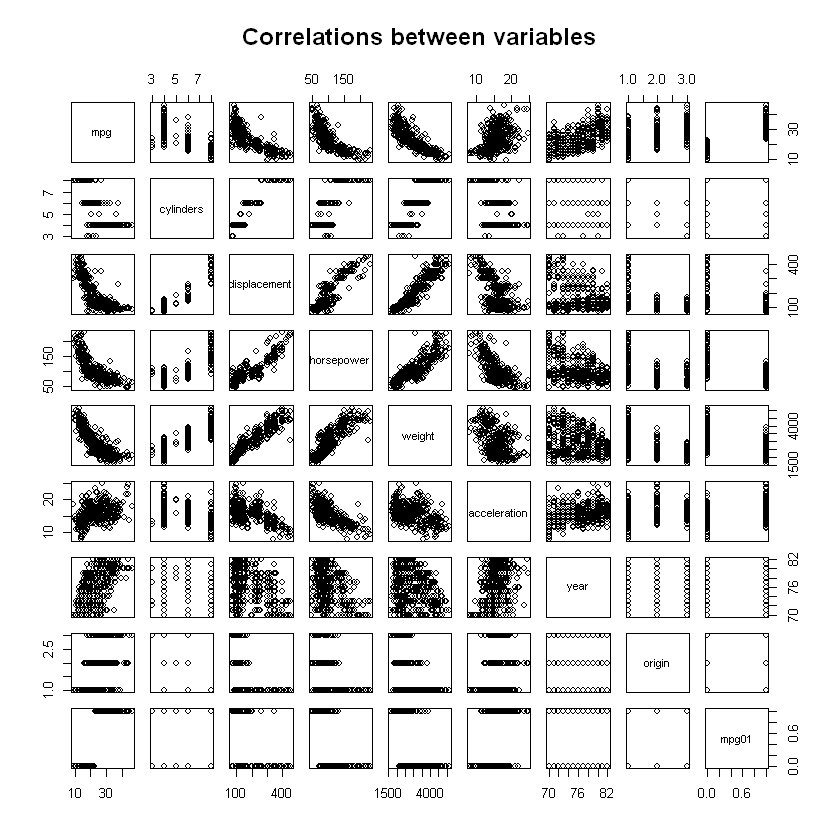

In [15]:
# Part B - Exploring data
pairs(Auto[, -9], main='Correlations between variables')


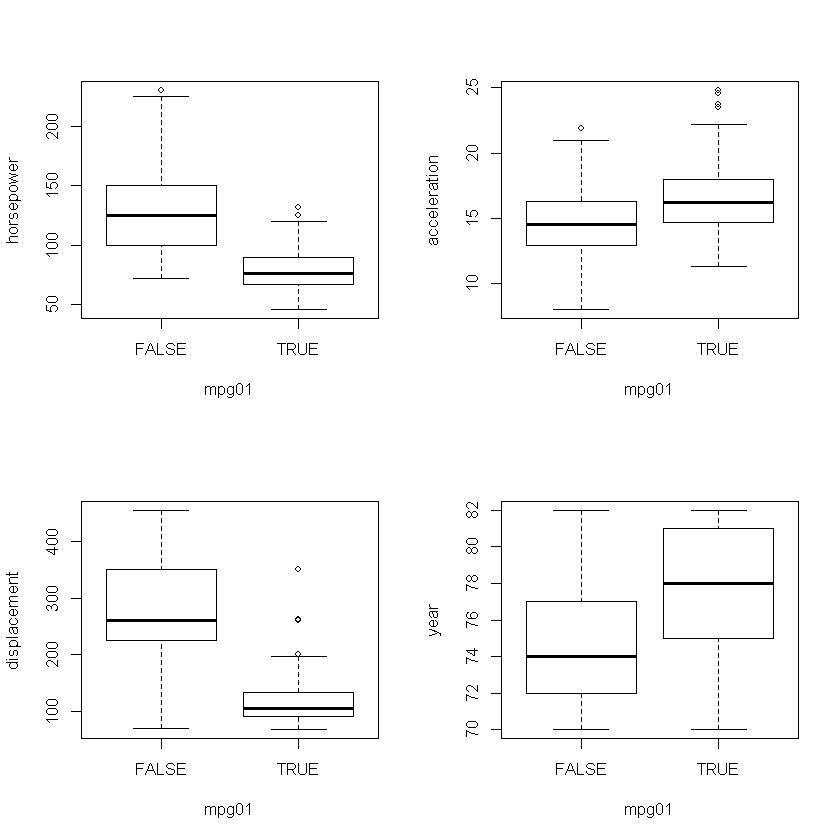

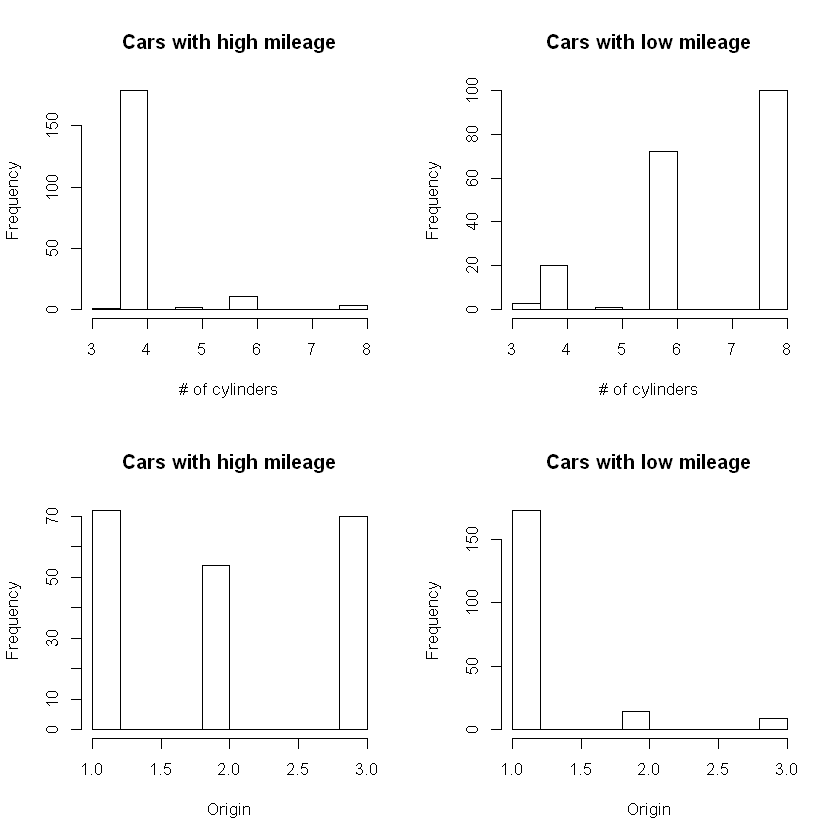

In [16]:
par(mfrow=c(2, 2))
boxplot(Auto$horsepower~Auto$mpg01, xlab='mpg01', ylab='horsepower')
#boxplot(Auto$cylinders~Auto$mpg01, xlab='mpg01', ylab='cylinders')
boxplot(Auto$acceleration~Auto$mpg01, xlab='mpg01', ylab='acceleration')
boxplot(Auto$displacement~Auto$mpg01, xlab='mpg01', ylab='displacement')
boxplot(Auto$year~Auto$mpg01, xlab='mpg01', ylab='year')
#boxplot(Auto$origin~Auto$mpg01, xlab='mpg01', ylab='origin')

par(mfrow=c(2, 2))
hist(Auto$cylinders[Auto$mpg01 ==1], xlab = '# of cylinders', main='Cars with high mileage')
hist(Auto$cylinders[Auto$mpg01 ==0], xlab = '# of cylinders', main='Cars with low mileage')
hist(Auto$origin[Auto$mpg01 ==1], xlab = 'Origin', main='Cars with high mileage')
hist(Auto$origin[Auto$mpg01 ==0], xlab = 'Origin', main='Cars with low mileage')

# The most releavant variables for mpg01 appear to be horsepower, dispacement, year, and cylinders. 
# Since horsepower and displacement are strongly correlated, only horsepower is used in the model. 

In [17]:
# Part C - Split into train and test set
set.seed = 50
Auto.nrows = dim(Auto)[1]
train.select = sample(Auto.nrows, size = 0.8*Auto.nrows)

train = Auto[train.select,]
test = Auto[-train.select,]


In [18]:
# Part D - LDA model
lda.fit = lda(mpg01 ~ horsepower+year+cylinders, data=train)
lda.predict = predict(lda.fit, newdata = test)
y_hat = lda.predict$class
y_actual = test$mpg01
confusion_matrix = table(y_hat, y_actual )
percent.correct = (sum(diag(confusion_matrix))/sum(confusion_matrix))
confusion_matrix
print(c("Correct Predictions:", percent.correct), quote = FALSE)


       y_actual
y_hat   FALSE TRUE
  FALSE    37    2
  TRUE      6   34

[1] Correct Predictions: 0.89873417721519    


In [19]:
# Part E - QDA model 
qda.fit = qda(mpg01 ~ horsepower+year+cylinders, data=train)
qda.predict = predict(qda.fit, newdata = test)
y_hat = qda.predict$class
y_actual = test$mpg01
confusion_matrix = table(y_hat, y_actual )
percent.correct = (sum(diag(confusion_matrix))/sum(confusion_matrix))
confusion_matrix
print(c("Correct Predictions:", percent.correct), quote = FALSE)

       y_actual
y_hat   FALSE TRUE
  FALSE    38    3
  TRUE      5   33

[1] Correct Predictions: 0.89873417721519    


In [20]:
# Part F - Logistic regression model
glm.fit = glm(mpg01 ~ horsepower+year+cylinders, family='binomial', data=train)

predictions.probs = predict(glm.fit, newdata = test, type='response') 
y_hat = predictions.probs > 0.5
y_actual = test$mpg01


confusion_matrix = table(y_hat, y_actual)
print(confusion_matrix)
percent.correct = (sum(diag(confusion_matrix))/sum(confusion_matrix))
print(c("Correct Predictions:", percent.correct), quote=FALSE)

       y_actual
y_hat   FALSE TRUE
  FALSE    36    5
  TRUE      7   31
[1] Correct Predictions: 0.848101265822785   


In [21]:
# Part G - KNN
train.df = data.frame(train$horsepower, train$year, train$cylinder)
train.y = train$mpg01
test.df = data.frame(test$horsepower, test$year, test$cylinder)

for (k.choice in c(1, 3, 5, 10, 20)){
    knn.predict = knn(train = train.df, test = test.df, cl=train.y, k = k.choice )
    
    print(c("k =", k.choice), quote = FALSE)
    confusion_matrix = table(knn.predict, y_actual)
    print(confusion_matrix)
    percent.correct = (sum(diag(confusion_matrix))/sum(confusion_matrix))
    print(c("Correct Predictions:", percent.correct), quote=FALSE)
}

[1] k = 1  
           y_actual
knn.predict FALSE TRUE
      FALSE    38    7
      TRUE      5   29
[1] Correct Predictions: 0.848101265822785   
[1] k = 3  
           y_actual
knn.predict FALSE TRUE
      FALSE    37    5
      TRUE      6   31
[1] Correct Predictions: 0.860759493670886   
[1] k = 5  
           y_actual
knn.predict FALSE TRUE
      FALSE    38    4
      TRUE      5   32
[1] Correct Predictions: 0.886075949367089   
[1] k = 10 
           y_actual
knn.predict FALSE TRUE
      FALSE    35    3
      TRUE      8   33
[1] Correct Predictions: 0.860759493670886   
[1] k = 20 
           y_actual
knn.predict FALSE TRUE
      FALSE    36    7
      TRUE      7   29
[1] Correct Predictions: 0.822784810126582   


### Question 12: Writing functions

In [ ]:
Power <- function(){
    print(2^3)
}
Power()

In [ ]:
Power2 <- function(x, a){
    print(x^a)
}
Power2(3, 8)
Power2(10, 3)
Power2(8, 17)
Power2(131, 3)

In [ ]:
Power3 <- function(x, a){
    return(x^a)
}
x = 1:10
plot(x, Power3(x, 2),type = "l", xlab="x", ylab="x squared", main="X-squared Plot")
?plot

In [ ]:
PlotPower <- function(x, a){
    plot(x, x^a, type='l')
}
PlotPower(1:10, 3)

### Question 13: Classification models of Boston dataset
Using logistic regression, LDA, and KNN models to predict if the crime rate for a neighborhood is above or below the median crime rate

In [22]:
Boston[1:5, ]
attach(Boston)
High_crime = crim > median(crim)
Boston = data.frame(Boston, High_crime)

Boston.nrows = dim(Boston)[1]
train.select = sample(Boston.nrows, size = 0.75*Boston.nrows)

train = Boston[train.select,]
test = Boston[-train.select,]


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
log.fit = glm(High_crime~nox+rad, family = 'binomial', data = train)
summary(log.fit)

log.predict = predict(log.fit, newdata=test, type='response')
y_hat = log.predict > 0.5
y_actual = test$High_crime

confusion_matrix = table(y_hat, y_actual)
print(confusion_matrix)
percent.correct = (sum(diag(confusion_matrix))/sum(confusion_matrix))
print(c("Correct Predictions:", percent.correct), quote=FALSE)


Call:
glm(formula = High_crime ~ nox + rad, family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.93260  -0.35287   0.00110   0.01361   2.48692  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -16.8515     2.1005  -8.022 1.04e-15 ***
nox          26.9432     3.5386   7.614 2.66e-14 ***
rad           0.4346     0.1092   3.981 6.86e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 525.19  on 378  degrees of freedom
Residual deviance: 197.79  on 376  degrees of freedom
AIC: 203.79

Number of Fisher Scoring iterations: 8


       y_actual
y_hat   FALSE TRUE
  FALSE    65   12
  TRUE      3   47
[1] Correct Predictions: 0.881889763779528   


In [24]:
lda.fit = lda(High_crime~nox+rad, data=train)
lda.predict = predict(lda.fit, newdata = test)
y_hat = lda.predict$class
y_actual = test$High_crime
confusion_matrix = table(y_hat, y_actual )
percent.correct = (sum(diag(confusion_matrix))/sum(confusion_matrix))
confusion_matrix
print(c("Correct Predictions:", percent.correct), quote = FALSE)

       y_actual
y_hat   FALSE TRUE
  FALSE    66   18
  TRUE      2   41

[1] Correct Predictions: 0.84251968503937    


In [27]:
qda.fit = qda(High_crime~nox+rad, data=train)
qda.predict = predict(qda.fit, newdata = test)
y_hat = qda.predict$class
y_actual = test$High_crime
confusion_matrix = table(y_hat, y_actual )
percent.correct = (sum(diag(confusion_matrix))/sum(confusion_matrix))
confusion_matrix
print(c("Correct Predictions:", percent.correct), quote = FALSE)

       y_actual
y_hat   FALSE TRUE
  FALSE    66   18
  TRUE      2   41

[1] Correct Predictions: 0.84251968503937    


In [26]:
train.df = data.frame(train$nox, train$rad)
train.y = train$High_crime
test.df = data.frame(test$nox, test$rad)

knn.predict = knn(train = train.df, test = test.df, cl=train.y, k = 3)
confusion_matrix = table(knn.predict, y_actual )
percent.correct = (sum(diag(confusion_matrix))/sum(confusion_matrix))
confusion_matrix
print(c("Correct Predictions:", percent.correct), quote = FALSE)


           y_actual
knn.predict FALSE TRUE
      FALSE    67    6
      TRUE      1   53

[1] Correct Predictions: 0.94488188976378    


For the Boston dataset, the most important predictors for classification of a high or low crime rate are accessibility to radial highways (rad) and nitrogen oxide concentration (nox). However, because this was a classification problem when it could have been represented as a regression problem, some other variables may be important for predicting crime rate. Of the classification models used, K-nearest neighbors had the best test-set accuacy, with 94%. LDA and QDA had the same accuracy at 84%, and logistic regression was about 88% accuracy. 